In [9]:
import numpy as np

def generate_cities(number_cities: int) -> list:
    """
    This function generates a list of cities with random coordinates in 3D space.

    Parameters:
    - number_cities (int): Number of cities to generate.

    Returns:
    - list: A list of cities with random coordinates.
    """
    # HERE Generate random 3D Points using numpy generator
    cities = np.random.rand(number_cities, 3)
    print("Cities:", cities)
    return cities

def calculate_distance(point_1: np.array, point_2: np.array) -> float:
    """
    This function calculates the Euclidean distance between two points.

    Parameters:
    - point_1 (np.array): First point.
    - point_2 (np.array): Second point.

    Returns:
    - float: The Euclidean distance between the two points.
    """
    #  HERE return distance between two points using euclidean distance formula
    distance = np.sqrt(np.sum((point_2 - point_1)**2))
    print("Distance between the two points:", distance)
    return distance


Cities: [[0.26473676 0.41483285 0.82552811]
 [0.4437593  0.86491354 0.59208772]
 [0.95852687 0.5032984  0.82899087]
 [0.28066972 0.54335648 0.14767711]
 [0.98735309 0.14121507 0.93976256]]
Distance between the two points: 5.196152422706632


5.196152422706632

**Funtion generate_cities:**

This funtion is used for generator a list of cities whit random coordinates in a sace 3D. The parameter "number_cities", is the number of cities that are generated.
Iside the funtion, used the library NumPy for generated the random coordinates. (number_cities,3) is a matriz, where each row are the coordinates (x,y,z) of one city.

**Funtion calculate_distance:**

This funtion calculate the Euclidean distance betwenn tow points in space 3D. Take tow parameters "point_1" y "point_2", that represent points in the space 3D.

In [21]:
# Test the functions
generate_cities(5)
calculate_distance(np.array([1, 2, 3]), np.array([4, 5, 6]))

Cities: [[0.36812314 0.3923714  0.70735372]
 [0.78786768 0.65077435 0.00428831]
 [0.82875057 0.20741857 0.1976176 ]
 [0.40904731 0.06267468 0.77864238]
 [0.28303057 0.69626614 0.43610804]]
Distance between the two points: 5.196152422706632


5.196152422706632

Here is an example of how these funtion are used and the results obtained:

Cities: [[0.36812314 0.3923714  0.70735372]
 [0.78786768 0.65077435 0.00428831]
 [0.82875057 0.20741857 0.1976176 ]
 [0.40904731 0.06267468 0.77864238]
 [0.28303057 0.69626614 0.43610804]]

Distance between the two points: 5.196152422706632,
5.196152422706632



In [10]:
def ant_colony_optimization(
    cities, n_ants, n_iterations, alpha, beta, evaporation_rate, Q
):
    """
    This function solves the Traveling Salesman Problem using Ant Colony Optimization.

    Parameters:
    - cities (list): List of cities.
    - n_ants (int): Number of ants.
    - n_iterations (int): Number of iterations.
    - alpha (float): It determines how much the ants are influenced by the pheromone trails left by other ants.
    - beta (float):  It determines how much the ants are influenced by the distance to the next city
    - evaporation_rate (float): Evaporation rate.
    - Q (float): It determines the intensity of the pheromone trail left behind by an ant.
    """

    number_cities = len(cities) # HERE Get number of points
    pheromone = np.ones((number_cities, number_cities))# HERE Initialize pheromone matrix with ones

    # initialize output metrics
    best_path = None
    best_path_length = np.inf

    # per each iteration the ants will build a path
    for iteration in range(n_iterations):
        paths = []  # store the paths of each ant
        path_lengths = []

        for ant in range(n_ants):
            visited = [False] * number_cities

            # you could start from any city, but let's start from a random one
            current_city = np.random.randint(number_cities)
            visited[current_city] = True
            path = [current_city]
            path_length = 0

            while False in visited:  # while there are unvisited cities
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                # based on pheromone, distance and alpha and beta parameters, define the preference
                # for an ant to move to a city
                for i, unvisited_city in enumerate(unvisited):
                    # HERE add equation to calculate the probability of moving to a city based on pheromone, distance and alpha and beta parameters
                    probabilities[i] = (pheromone[current_city,unvisited_city]**alpha)*((1/calculate_distance(cities[current_city], cities[unvisited_city])) ** beta)

                # normalize probabilities, it means, the sum of all probabilities is 1
                # HERE add normalization for calculated probabilities
                probabilities /= probabilities.sum()

                next_city = np.random.choice(unvisited, p=probabilities)
                path.append(next_city)
                # increase the cost of move through the path
                path_length += calculate_distance(
                    cities[current_city], cities[next_city]
                )
                visited[next_city] = True
                # move to the next city, for the next iteration
                current_city = next_city

            paths.append(path)
            path_lengths.append(path_length)

            # update with current best path, this is a minimization problem
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        # remove a bit of pheromone of all map, it's a way to avoid local minima
        pheromone *= evaporation_rate

        # current ant must add pheromone to the path it has walked
        for path, path_length in zip(paths, path_lengths):
            for i in range(number_cities - 1):
                pheromone[path[i], path[i + 1]] += Q / path_length
            pheromone[path[-1], path[0]] += Q / path_length

    return best_path, best_path_length


**The funtion "ant_colony_optimization"**
The funtion starts by initializing a pheromone array whit some in all positions. Then the ants build paths exploring the cities,influenced by pheromones and the distance from the cities.


In [31]:
# model parameters
number_cities = 40
number_ants = 10
number_iterations = 10
alpha = 1
beta = 1
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = generate_cities(number_cities)

# HERE call ant_colony_optimization function
best_path, best_path_length = ant_colony_optimization(
    cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q
)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Distance between the two points: 0.8482843136855472
Distance between the two points: 0.6455910648358103
Distance between the two points: 0.5690291585250342
Distance between the two points: 0.4265138297622143
Distance between the two points: 0.48239860357696
Distance between the two points: 0.23724543066718326
Distance between the two points: 0.6236898511219613
Distance between the two points: 0.5063419732604999
Distance between the two points: 0.23724543066718326
Distance between the two points: 0.8334730533592905
Distance between the two points: 0.739930774967322
Distance between the two points: 0.5695525186826277
Distance between the two points: 1.1368828618024354
Distance between the two points: 0.9589286673968809
Distance between the two points: 0.8806792228125173
Distance between the two points: 0.44079619292665473
Distance between the two points: 0.31046144741083403
Distance between the two points: 0.5879112509008

Best path: [22, 7, 10, 0, 8, 27, 26, 4, 28, 16, 1, 12, 19, 21, 23, 11, 5, 14, 20, 13, 24, 9, 18, 6, 15, 2, 25, 29, 17, 3]
Best path length: 11.210485844479361


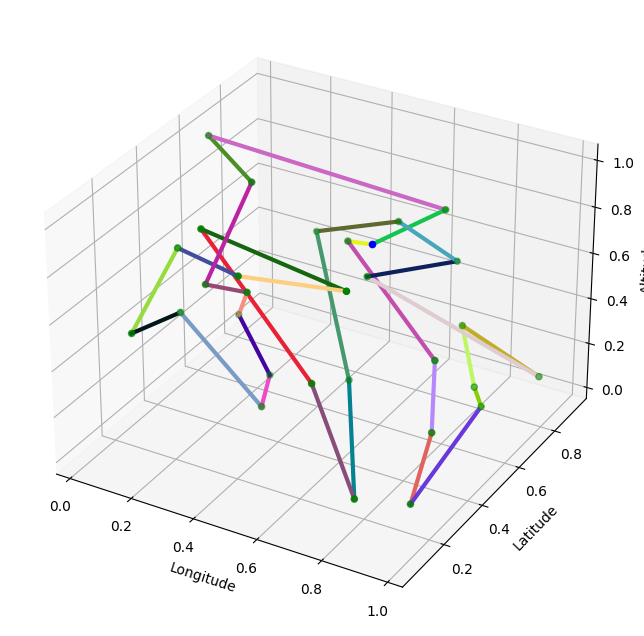

In [30]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def random_color() -> list:
    """
    This function generates a random color in RGB porcentage intensity.

    Returns:
    - list: A list with three random values between 0 and 1.
    """
    return [random.random(), random.random(), random.random()]


def plot_aco_route(cities: np.array, best_path: list):
    """
    This function plots the cities and the best path found by the ACO algorithm.

    Parameters:
    - cities (np.array): A list of cities with their coordinates.
    - best_path (list): The best path found by the ACO algorithm.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    for i in range(len(best_path) - 1):
        ax.plot(
            [cities[best_path[i], 0], cities[best_path[i + 1], 0]],  # x axis
            [cities[best_path[i], 1], cities[best_path[i + 1], 1]],  # y axis
            [cities[best_path[i], 2], cities[best_path[i + 1], 2]],  # z axis
            c=random_color(),
            linestyle="-",
            linewidth=3,
        )

    ax.plot(
        [cities[best_path[0], 0], cities[best_path[-1], 0]],
        [cities[best_path[0], 1], cities[best_path[-1], 1]],
        [cities[best_path[0], 2], cities[best_path[-1], 2]],
        c=random_color(),
        linestyle="-",
        linewidth=3,
    )

    ax.scatter(cities[0, 0], cities[0, 1], cities[0, 2], c="b", marker="o")
    ax.scatter(cities[1:, 0], cities[1:, 1], cities[1:, 2], c="g", marker="o")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Altitude")
    plt.show()


print("Best path:", best_path)
print("Best path length:", best_path_length)
plot_aco_route(cities, best_path)


**Results of Ant Colony Optimization (ACO)**

**Parameters of model**

Number of cities:10

Number of ants: 100

Number of iterations: 100

alpha = 1

beta = 1

evaporation_rate = 0.5

Q = 1

**Results obtained**

For Number of cities:10:

Best path: [3, 2, 7, 0, 9, 1, 4, 6, 5, 8]

Best path length: 3.647989468991309

execution time: 5m

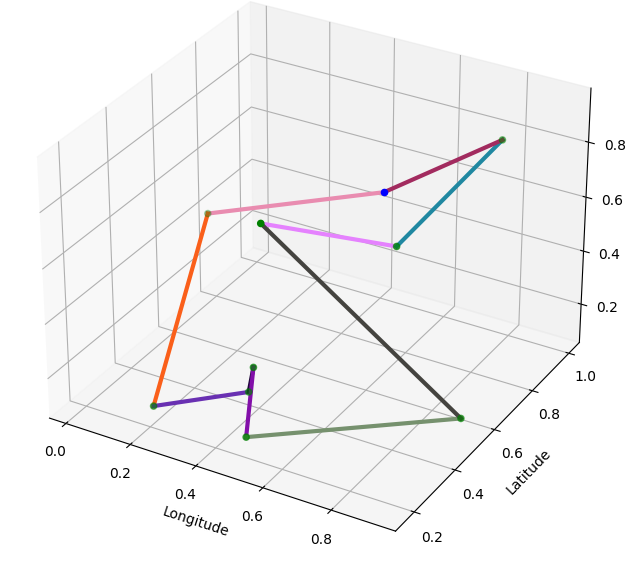

For Number of cities:20:

Best path: [3, 2, 7, 0, 9, 1, 4, 6, 5, 8]

Best path length: 3.647989468991309

execution time: 5m

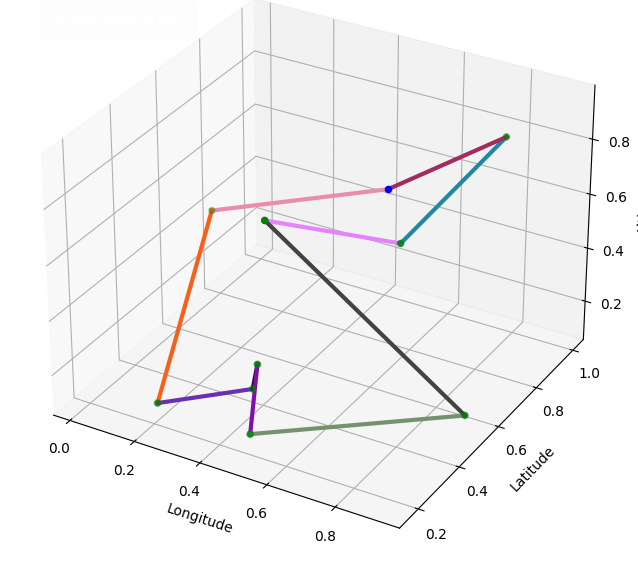

For Number of cities:30

Number of ants: 10

Number of iterations: 10

In this case we lower the number of ants and iterations for that the process takes less time

execution time: 22s

Best path: [22, 7, 10, 0, 8, 27, 26, 4, 28, 16, 1, 12, 19, 21, 23, 11, 5, 14, 20, 13, 24, 9, 18, 6, 15, 2, 25, 29, 17, 3]

Best path length: 11.210485844479361

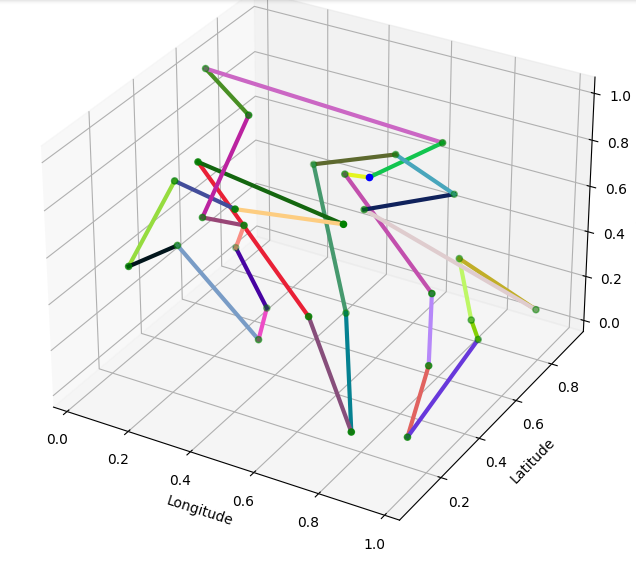

For Number of cities:40

Number of ants: 10

Number of iterations: 10

In this case we lower the number of ants and iterations for that the process takes less time

execution time: 39s
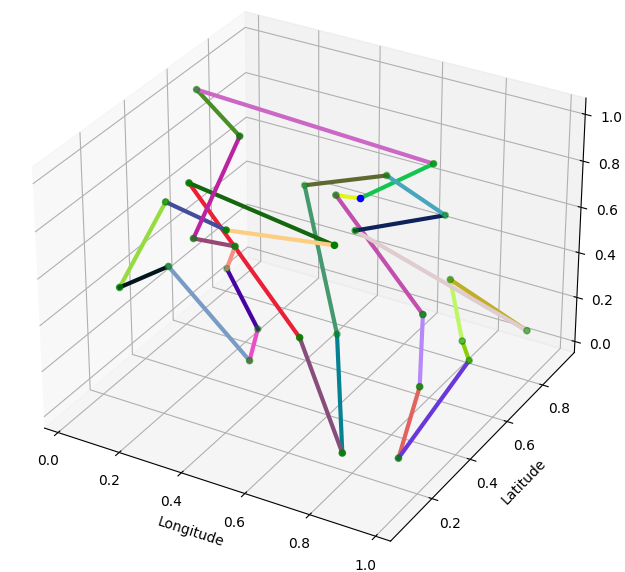

It is concluded that by lowering the number of iterations and the number of ants, the efficient paths are not clear.
